In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import load_1d_dataset
sns.set_context('talk')
import pint
current_palette = sns.color_palette()
ureg = pint.UnitRegistry()

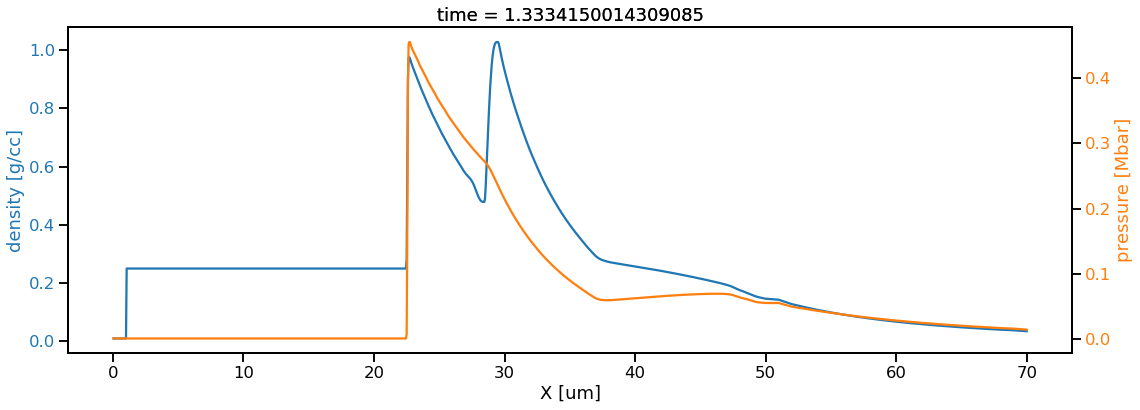

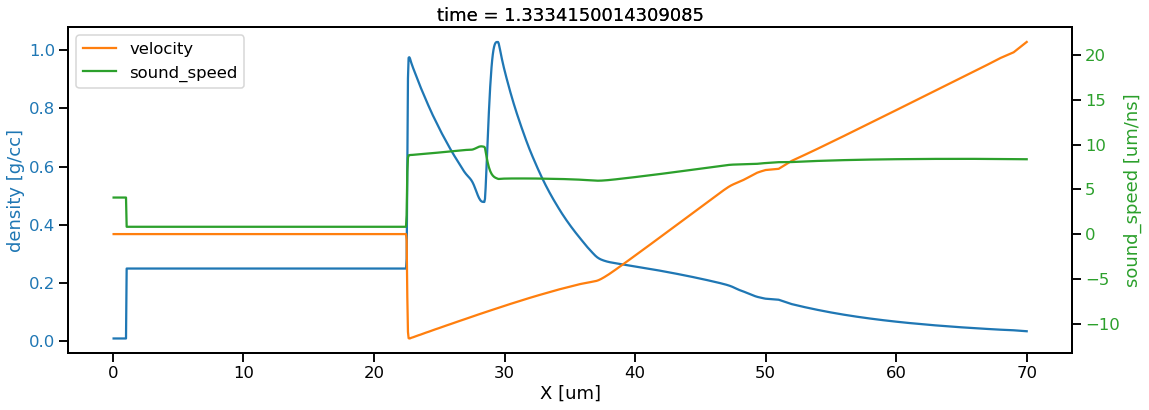

In [167]:
ds = load_1d_dataset(folder='.', units='icf')


fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
t = -1

for ax,c,v in zip([ax1, ax2], 
                current_palette[0:2],
               ['density', 'pressure']):
    ds[v][t].plot(ax=ax, color=c)
    ax.tick_params(axis='y', labelcolor=c)
    ax.yaxis.label.set_color(c)
ax1.set_xlabel('X [um]')
plt.show()


fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
for ax,c,v in zip([ax1, ax2, ax2], 
                   current_palette[0:3],
                  ['density', 'velocity', 'sound_speed']):
    ds[v][t].plot(ax=ax, color=c, label=v)
    ax.tick_params(axis='y', labelcolor=c)
    ax.yaxis.label.set_color(c)
# ax2.set_yscale('log')
plt.legend()
ax1.set_xlabel('X [um]')
plt.show()


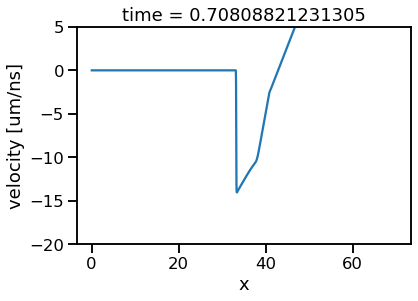

In [165]:
ds.velocity[-1].plot()
plt.ylim(-20,5)
# plt.xlim(0,20)
plt.show()

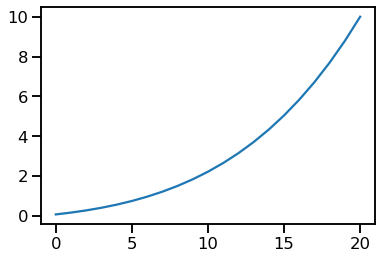

In [232]:
x=np.arange(20,41)
dx = 10*(np.cumsum(x**4)/np.cumsum(x**4).max())
plt.plot(dx)

In [12]:
ds = load_1d_dataset(folder='.', units='icf')
gamma = 5.0/3.0
ds['Sound Speed'] = np.sqrt(gamma*ds.Pressure/ds.Density)
ds['Mach Number'] = np.abs(ds.x_velocity)/ds['Sound Speed']

fig, rho_ax = plt.subplots(figsize=(18,6))
p_ax = rho_ax.twinx()

t=-1

color = 'r'
ds.Density[t].plot(ax=rho_ax,color=color)
rho_ax.set_ylabel('Density [g/cc]', color=color)
rho_ax.tick_params(axis='y', labelcolor=color)
rho_ax.set_title('')
color='b'
ds.Pressure[t].plot(ax=p_ax,color=color)
p_ax.set_ylabel('Pressure [Mbar]', color=color)
p_ax.tick_params(axis='y', labelcolor=color)
p_ax.set_title('')

v_ax = rho_ax.twinx()
color='k'
ds.x_velocity[t].plot(ax=v_ax, color=color)

ds['Sound Speed'][t].plot(ax=v_ax, color='g')
# ds['Mach Number'][t].plot(ax=v_ax, color='g')


v_ax.set_ylabel('Velocity [km/s]', color=color)
v_ax.spines["right"].set_position(("axes", 1.1))
v_ax.tick_params(axis='y', labelcolor=color)
# v_ax.set_ylim(-10,20)
v_ax.set_title('')
plt.title(f"Time = {ds.time[t].data:.4f} ns")

# plt.xlim(45,55)

plt.tight_layout()
plt.show()

pulse = np.loadtxt('energy_input.dat')
plt.figure(figsize=(18,6))

time = (pulse[:,0] * ureg('s')).to('ns').m

p = (pulse[:,1] * ureg('barye')).m


plt.plot(time,p)
plt.axvline(x=ds.time[t].data, color='k')
plt.xlabel('Time [ns]')
plt.ylabel('Pressure [barye]')
plt.show()

AttributeError: 'Dataset' object has no attribute 'Pressure'

In [ ]:
ds['Pressure'][-1,-1]

# (np.abs(ds.x_velocity[t]) + ds['Sound Speed'][t]).plot(color='r')


In [ ]:
ds.Density[-1].argmin()

In [ ]:
ds['Mach Number'][-1].plot()
ds.Density[-1].plot()

In [ ]:
pulse = np.loadtxt('energy_input.dat')
plt.figure(figsize=(18,6))
plt.plot(pulse[:,0], pulse[:,1])
# plt.xlim(0,2e-5)
plt.xlabel('Time [sec]')
plt.ylabel('Pressure [barye]')
plt.show()